# Multiple Logistic Regression

## Library

In [ ]:
#import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## Data

In [ ]:
df= pd.read_csv('./cancer_data.csv') #read the dataset
#Explore the dataset
df.head()
df.describe() #To know more about the dataset

,TMB_NONSYNONYMOUS,PIK3CA,BARD1,MAP3K13,NOTCH4,TP53,EZH2,MDM2,IGF1R,KEAP1,...,PPARG,MSI2,DUSP4,RRAS2,ERF,HLA-B,RECQL,SESN1,NTHL1,RRAS
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,...,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,11.562370,0.120409,0.013847,0.026490,0.067429,0.444311,0.024082,0.007827,0.037929,0.059001,...,0.008429,0.002408,0.001806,0.001204,0.003612,0.004214,0.003612,0.001204,0.001806,0.000602
std,18.369198,0.325538,0.116891,0.160636,0.250839,0.497039,0.153350,0.088148,0.191082,0.235697,...,0.091448,0.049029,0.042473,0.034690,0.060012,0.064800,0.060012,0.034690,0.042473,0.024537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.936159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.872318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.091553,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,207.488576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Clean the data set

In [ ]:
#Check for null entries
print("Number of null values in the data set are - ",df.isnull().values.any().sum())
#Replace yes and no entries in target to 1 and 0 repsectively
df=df.replace({'OS_STATUS':{'1:DECEASED':0, '0:LIVING':1}})
df=df.replace({'SEX':{'Female':1, 'Male':0}})
df=df.drop(labels = 1042, axis = 0)
#Updated version
df.head()
df.describe()

Number of null values in the data set are -  0


,OS_STATUS,SEX,TMB_NONSYNONYMOUS,PIK3CA,BARD1,MAP3K13,NOTCH4,TP53,EZH2,MDM2,...,PPARG,MSI2,DUSP4,RRAS2,ERF,HLA-B,RECQL,SESN1,NTHL1,RRAS
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.00000,1660.000000,1660.000000,1660.000000,...,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,0.499398,0.377711,11.569335,0.120482,0.013855,0.026506,0.06747,0.444578,0.024096,0.007831,...,0.008434,0.002410,0.001807,0.001205,0.003614,0.004217,0.003614,0.001205,0.001807,0.000602
std,0.500150,0.484961,18.372539,0.325622,0.116926,0.160683,0.25091,0.497069,0.153395,0.088174,...,0.091475,0.049044,0.042486,0.034700,0.060030,0.064820,0.060030,0.034700,0.042486,0.024544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.936159,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.872318,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,11.128935,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,207.488576,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Deal with the outliers

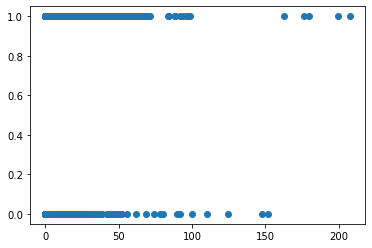

In [ ]:
#Plot the data to spot the outliers
fig = plt.subplot()
fig.scatter(df.TMB_NONSYNONYMOUS, df.OS_STATUS)

In [ ]:
#sns.boxplot(df.TMB_NONSYNONYMOUS)

In [ ]:
#Function to find the upper and lower limits to identify and remover outliers
#def interQuartile(x):
#  percentile25= x.quantile(0.25)
#  percentile75=x.quantile(0.75)
#  iqr=percentile75-percentile25
#  upperLimit= percentile75+1.5*iqr
#  lowerLimit= percentile25-1.5*iqr
#  return upperLimit, lowerLimit
#upper,lower= interQuartile(df.TMB_NONSYNONYMOUS)
#print("Lower and upper limit calculated are -", upper, lower)

#print("Number of entries below the lower limit are ", (df.TMB_NONSYNONYMOUS < lower).sum())
#print("Number of entries above the upper limit are ", (df.TMB_NONSYNONYMOUS > upper).sum())


In [ ]:
#Function to drop the outliers
#def dropOutliers(x, upper, lower):
    #TODO
#    return
#dropOutliers(df, upper, lower)

## Construct training set and testing set

In [ ]:
#Define the independent and dependent variables
y= df.OS_STATUS #dependent variable is Decision
x= df.drop(['OS_STATUS','CANCER_TYPE','PATIENT_ID'], axis = 1)
print(x.shape)
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
# x_train = x_train.values.reshape(-1, 1)
#x_test = x_test.values.reshape(-1, 1)

(1660, 471)


## Fit a logistic regression model

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(x_train, y_train)
#print the regression coefficients
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-0.68812593]
The coefficient b1=  [[ 2.44875841e-02  5.81730616e-03 -2.96720800e-02 -8.61282840e-02
  -3.75520836e-01  5.52915845e-01  1.76130358e-01 -2.77829012e-01
   5.85622060e-02  5.71217890e-02 -7.50595552e-01 -3.12668806e-01
   4.14148342e-01  6.70253928e-01 -1.29907281e-01 -1.01379462e-01
   3.99793377e-02  3.25323115e-01  5.42287045e-01 -6.95620213e-01
   7.90717988e-01  7.61059466e-01  2.45037238e-01  5.06156766e-01
  -1.33620825e-01  7.66686520e-02  3.02031500e-01 -3.70605183e-01
   1.52910013e-01  6.01959859e-01 -2.87210192e-01 -2.76196592e-01
   1.66379381e-01  5.74177516e-01  3.02162006e-01  2.67223431e-01
   4.41124220e-01  2.14324144e-01 -3.24475154e-01 -4.09381877e-01
   4.39686311e-01 -2.48878715e-01 -4.84382781e-01 -1.72910913e-01
   3.52524980e-01  3.12173315e-01  3.45707263e-01 -5.27625223e-01
  -2.08801248e-01  9.04213973e-03  4.70796317e-02  7.89905373e-01
  -2.71331207e-01 -1.67668320e-01 -1.66564108e-01  2.32914194e-01
  -5.48573248e-01 -5.4

In [ ]:
y_pred= modelLogistic.predict(x_test)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

[[105  51]
 [101  75]]
Accuracy from confusion matrix is  0.5421686746987951


## Summary

In [ ]:
#Using statsmodels package to obtian the model
#import statsmodels.api as sm
#x_train = sm.add_constant(x_train)
#logit_model=sm.Logit(y_train,x_train)
#result=logit_model.fit()
#print(result.summary())